In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=64
CHANNELS=3
EPOCH=50

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 13884 files belonging to 9 classes.


In [4]:
class_names=dataset.class_names
n_classes=len(class_names)
class_names

['Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [7]:
def split_data(dataset,train_split=0.8,validation_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(dataset)
    if(shuffle):
        dataset=dataset.shuffle(shuffle_size,seed=12)
    train_size=int(ds_size*train_split)
    val_size=int(ds_size*validation_split)
    train_ds=dataset.take(train_size)
    val_ds=dataset.skip(train_size).take(val_size)
    test_ds=dataset.skip(train_size+val_size)
    
    return train_ds,val_ds,test_ds

In [8]:
train_ds,val_ds,test_ds=split_data(dataset)

In [12]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
resize_and_scale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [14]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [17]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
model=models.Sequential([
    resize_and_scale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(n_classes,activation="softmax")
])
model.build(input_shape=input_shape)

In [18]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [19]:
history=model.fit(
    train_ds,epochs=50,batch_size=BATCH_SIZE,verbose=1,validation_data=val_ds
)

Epoch 1/50
173/173 [==============================] - 401s 2s/step - loss: 1.7026 - accuracy: 0.3640 - val_loss: 1.7519 - val_accuracy: 0.4345
Epoch 2/50
173/173 [==============================] - 352s 2s/step - loss: 1.0954 - accuracy: 0.6087 - val_loss: 1.1394 - val_accuracy: 0.5878
Epoch 3/50
173/173 [==============================] - 340s 2s/step - loss: 0.8775 - accuracy: 0.6856 - val_loss: 1.1962 - val_accuracy: 0.5833
Epoch 4/50
173/173 [==============================] - 336s 2s/step - loss: 0.6935 - accuracy: 0.7547 - val_loss: 1.1787 - val_accuracy: 0.6436
Epoch 5/50
173/173 [==============================] - 341s 2s/step - loss: 0.5690 - accuracy: 0.7967 - val_loss: 0.8981 - val_accuracy: 0.7158
Epoch 6/50
173/173 [==============================] - 339s 2s/step - loss: 0.4557 - accuracy: 0.8358 - val_loss: 0.7650 - val_accuracy: 0.7723
Epoch 7/50
173/173 [==============================] - 335s 2s/step - loss: 0.4257 - accuracy: 0.8484 - val_loss: 0.8159 - val_accuracy: 0.7560

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
loss=history.history["loss"]
val_loss=history.history["val_loss"]

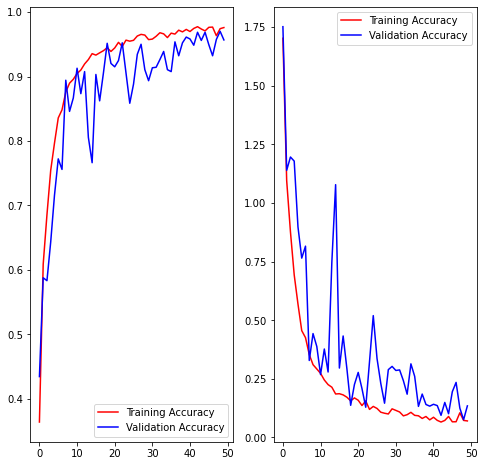

In [22]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCH),acc,label="Training Accuracy",color="red")
plt.plot(range(EPOCH),val_acc,label="Validation Accuracy",color="blue")
plt.legend(loc="lower right")


plt.subplot(1,2,2)
plt.plot(range(EPOCH),loss,label="Training Accuracy",color="red")
plt.plot(range(EPOCH),val_loss,label="Validation Accuracy",color="blue")
plt.legend(loc="upper right")

first image predict
actual label: Tomato__Tomato_YellowLeaf__Curl_Virus
prediction: Tomato__Tomato_YellowLeaf__Curl_Virus


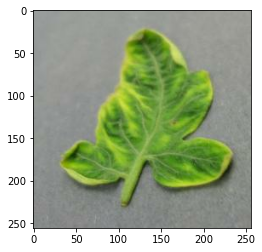

In [26]:
for images_batch, labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype("uint8")
    first_label=labels_batch[0].numpy()
    print("first image predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    batch_prediction=model.predict(images_batch)
    print("prediction:",class_names[np.argmax(batch_prediction[0])])

In [27]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions)),2)
    return predicted_class,confidence

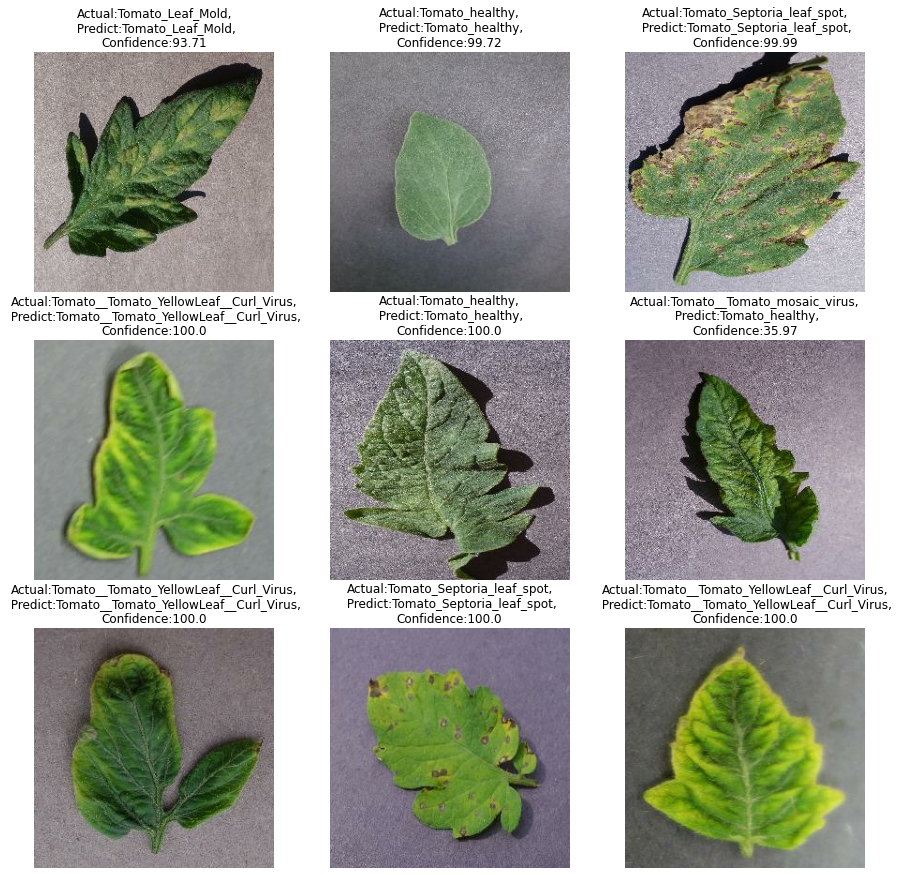

In [28]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predict:{predicted_class},\nConfidence:{confidence}")
        plt.axis("off")

In [29]:
import os
model_version=max([int(i) for i in os.listdir("../saved_models")+[0]])+1
model.save(f"../saved_models/{model_version}")

INFO:tensorflow:Assets written to: ../saved_models/1\assets
